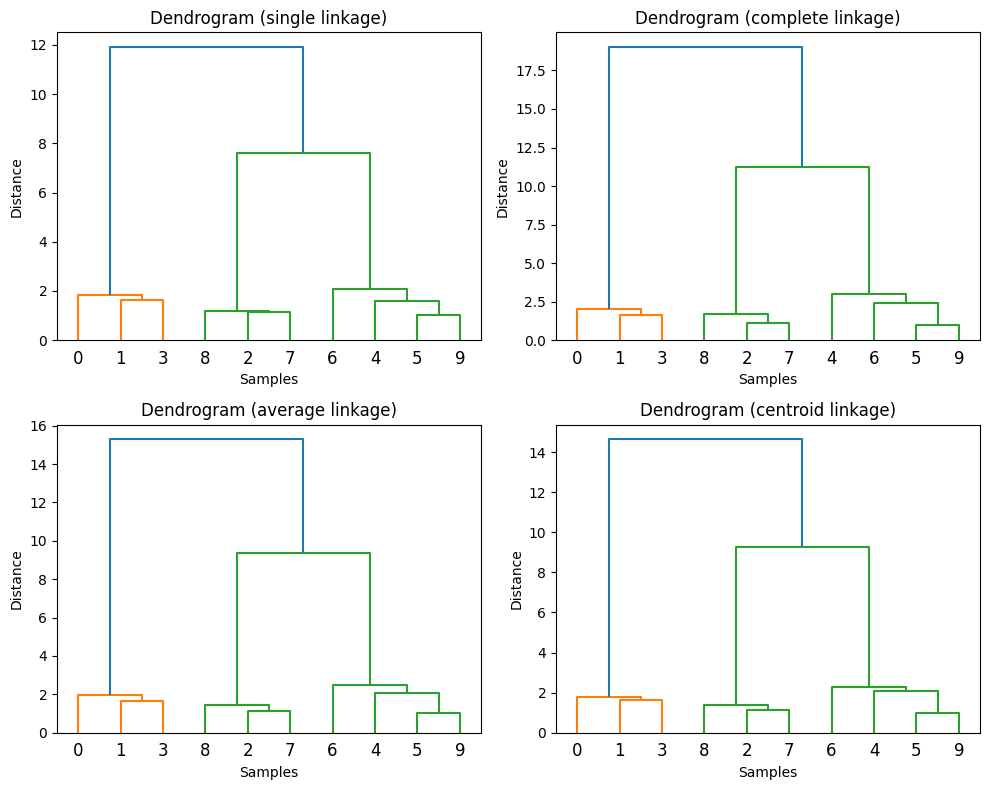

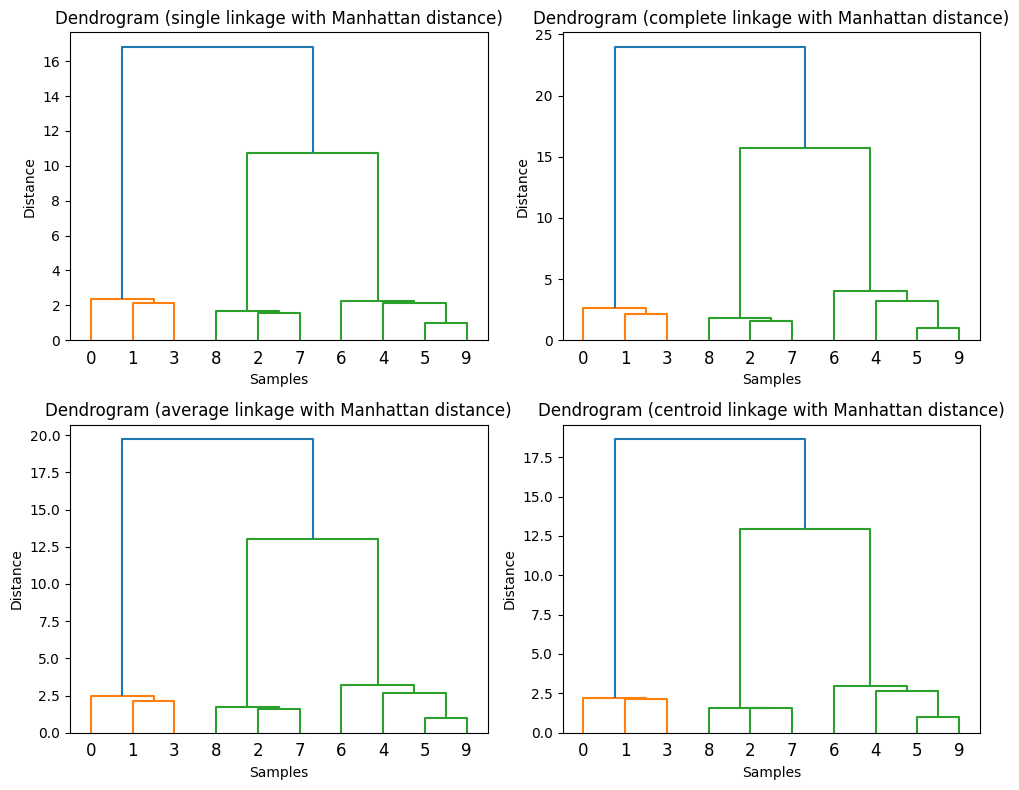

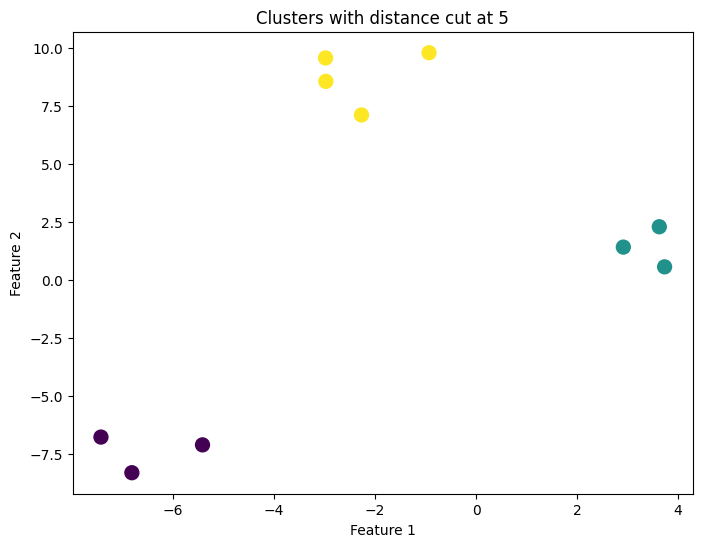

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.datasets import make_blobs
from scipy.spatial.distance import pdist, squareform

# Create a simple dataset
X, _ = make_blobs(n_samples=10, centers=3, random_state=42)

# Linkage methods for Task 1
linkage_methods = ['single', 'complete', 'average', 'centroid']

# Task 1: Hierarchical clustering with Euclidean distance
plt.figure(figsize=(10, 8))

for i, method in enumerate(linkage_methods, 1):
    plt.subplot(2, 2, i)
    Z = sch.linkage(X, method=method, metric='euclidean')
    sch.dendrogram(Z)
    plt.title(f'Dendrogram ({method} linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()

# Task 2: Hierarchical clustering with Manhattan distance
plt.figure(figsize=(10, 8))

for i, method in enumerate(linkage_methods, 1):
    plt.subplot(2, 2, i)
    dist_matrix = pdist(X, metric='cityblock')  # Manhattan distance
    Z = sch.linkage(dist_matrix, method=method)
    sch.dendrogram(Z)
    plt.title(f'Dendrogram ({method} linkage with Manhattan distance)')
    plt.xlabel('Samples')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()

# Task 3: Cut the dendrogram to create clusters
cut_distance = 5  # Specify the cutting distance

Z = sch.linkage(X, method='complete', metric='euclidean')
clusters = sch.fcluster(Z, t=cut_distance, criterion='distance')

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=100)
plt.title(f'Clusters with distance cut at {cut_distance}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
